# MainSection (Mandatory):A1. Take any 2 features from your project having has real numeric values. Make a scatter plot of the data and observe the pattern.

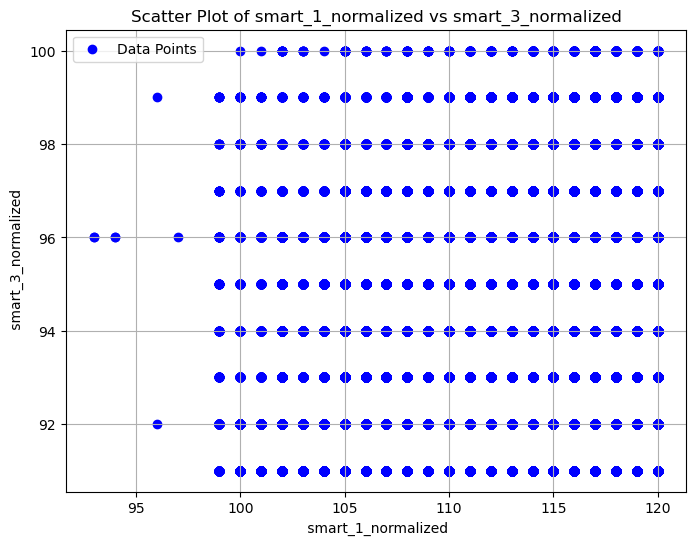

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own dataset)
data = pd.read_csv('hdddata.csv')
    


# Create a DataFrame
df = pd.DataFrame(data)

# Extract the two features
feature1 = df['smart_1_normalized']
feature2 = df['smart_3_normalized']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c='b', marker='o', label='Data Points')
plt.xlabel(' smart_1_normalized')
plt.ylabel(' smart_3_normalized')
plt.title('Scatter Plot of smart_1_normalized vs smart_3_normalized')
plt.legend()
plt.grid(True)
plt.show()


# A2. Create a linear regression model on this data. Consider using one feature as independent variable while the other as dependent variable (you may also round this number to integer). After the model is created, calculate the mean square error by predicting the values from the model. Refer site: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html.

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset into a DataFrame
data = pd.read_csv('hdddata.csv')

# Drop rows with missing values in 'failure' and 'smart_1_normalized' columns
data_cleaned = data.dropna(subset=['failure', 'smart_1_normalized'])

# Split the data into the independent variable (X) and the dependent variable (y)
X = data_cleaned[['smart_1_normalized']]
y = data_cleaned['failure']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
print("Coefficients: \n", model.coef_)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
# print("Coefficient of determination: %.2f" % r2_score(y, y_pred))


Coefficients: 
 [-0.00014358]
Mean Squared Error: 0.03


In [6]:
from sklearn.linear_model import LinearRegression

# Create and train a Linear Regression model with your data (X and y)
model = LinearRegression()
model.fit(X, y)

# Access model attributes
intercept = model.intercept_  # Intercept (bias) term
coefficients = model.coef_  # Coefficients for each feature

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 0.049690666343061754
Coefficients: [-0.00014358]


# A4. Using the training set available for your project, train a logistic regression classifier. Use this classifier to evaluate your test set accuracy. Study the various parameters associated with logistic regression model and the role they play in the model training.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load   dataset  
data = pd.read_csv('hdddata.csv ')

# Drop rows with missing values in 'failure' and 'smart_1_normalized' columns
data_cleaned = data.dropna(subset=['failure', 'smart_1_normalized'])

# Split the data into the independent variable (X) and the dependent variable (y)
X = data_cleaned[['smart_1_normalized']]
y = data_cleaned['failure']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.97
Confusion Matrix:
 [[73457     0]
 [ 2556     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     73457
           1       0.00      0.00      0.00      2556

    accuracy                           0.97     76013
   macro avg       0.48      0.50      0.49     76013
weighted avg       0.93      0.97      0.95     76013



C:\Users\91993\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91993\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91993\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Load the dataset
data = pd.read_csv('hdddata.csv')
data_cleaned = data.dropna(subset=['failure', 'smart_1_normalized','smart_3_normalized'])

# Split the data into the independent variable (X) and the dependent variable (y)

# Select the features and the target variable
X = data_cleaned[['smart_1_normalized', 'smart_3_normalized']]
y = data_cleaned['failure']

# Convert 'failure' to binary class (1 for failure, 0 for non-failure)
y = y.apply(lambda x: 1 if x > 0 else 0)
# Create the regression tree model
model_tree = DecisionTreeRegressor()

# Train the model
model_tree.fit(X, y)

# Make predictions for the same data (for demonstration purposes)
predictions_tree = model_tree.predict(X)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse_tree = np.mean((predictions_tree - y) ** 2)
print(f"Mean Squared Error (Regression Tree): {mse_tree:.2f}")
# Create the k-NN regressor model
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
model_knn.fit(X, y)

# Make predictions for the same data (for demonstration purposes)
predictions_knn = model_knn.predict(X)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse_knn = np.mean((predictions_knn - y) ** 2)
print(f"Mean Squared Error (k-NN Regressor): {mse_knn:.2f}")


Mean Squared Error (Regression Tree): 0.03
Mean Squared Error (k-NN Regressor): 0.04
